In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# Load the data
file_path = "WL1.csv"  
wl1_df = pd.read_csv(file_path)

In [36]:
time = wl1_df["Time"]
cop_x = wl1_df["CoPx"]  # Medial-lateral sway
cop_y = wl1_df["CoPy"]  # Anterior-posterior sway
wl1_df

,Time,Fz,Mx,My,CoPx,CoPy
0,0.000,733.539695,54.866495,-9.439786,0.012869,0.074797
1,0.001,733.539695,54.866495,-9.439786,0.012869,0.074797
2,0.002,733.539695,54.866495,-9.439786,0.012869,0.074797
3,0.003,733.539695,54.866495,-9.439786,0.012869,0.074797
4,0.004,733.446825,54.886085,-9.418026,0.012841,0.074833
...,...,...,...,...,...,...
59991,59.991,733.719865,62.863135,-13.357247,0.018205,0.085677
59992,59.992,733.717515,62.823655,-13.356647,0.018204,0.085624
59993,59.993,733.809735,62.804285,-13.335067,0.018172,0.085587
59994,59.994,733.810385,62.804065,-13.378407,0.018231,0.085586


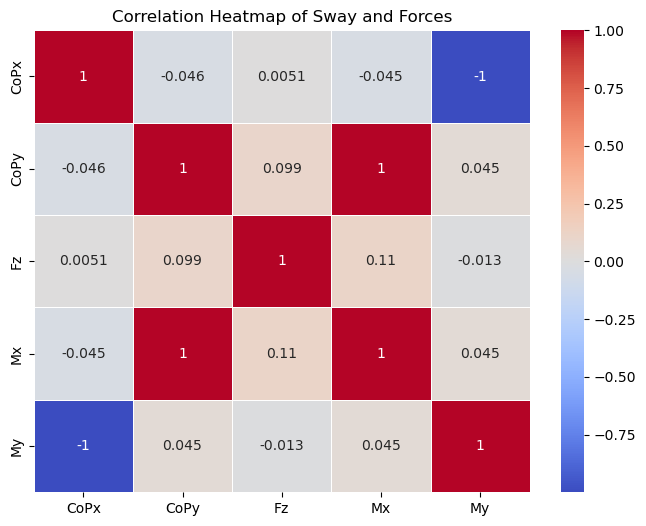

In [24]:
# Compute the correlation matrix
correlation_matrix = wl1_df[['CoPx', 'CoPy', 'Fz', 'Mx', 'My']].corr()

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap of Sway and Forces")
plt.show()

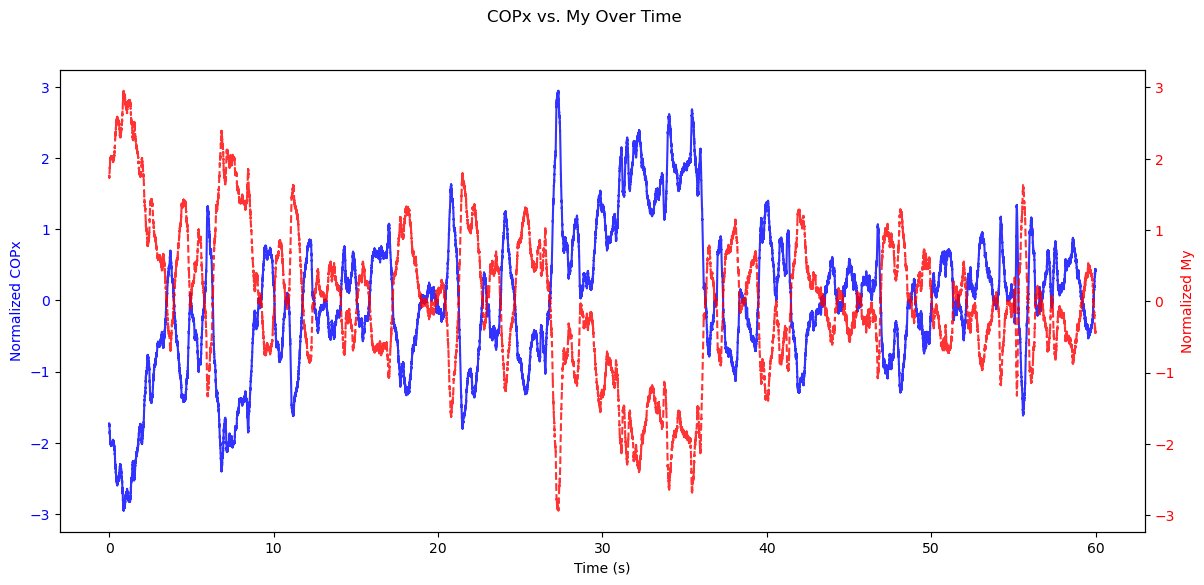

In [58]:
from sklearn.preprocessing import StandardScaler

# Extract relevant data
cop_x = wl1_df["CoPx"]
my = wl1_df["My"]

# Stack together for consistent normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(wl1_df[["CoPx", "My"]])

# Assign back normalized values
cop_x_norm = normalized_data[:, 0]
my_norm = normalized_data[:, 1]

# Stretch out graph for clarity
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Normalized COPx", color='b')
ax1.plot(time, cop_x_norm, color='b', alpha=0.8, label="COPx (Lateral Sway)")
ax1.tick_params(axis='y', labelcolor='b')

# Secondary y-axis for My
ax2 = ax1.twinx()
ax2.set_ylabel("Normalized My", color='r')
ax2.plot(time, my_norm, color='r', linestyle="dashed", alpha=0.8, label="My (Moment around Y-axis)")
ax2.tick_params(axis='y', labelcolor='r')

fig.suptitle("COPx vs. My Over Time")
plt.show()

COPx Summary:
 count    59996.000000
mean         0.017139
std          0.002469
min          0.009847
25%          0.015756
50%          0.017162
75%          0.018622
max          0.024410
Name: CoPx, dtype: float64
COPy Summary:
 count    59996.000000
mean         0.078590
std          0.006257
min          0.058231
25%          0.074664
50%          0.078841
75%          0.082756
max          0.091849
Name: CoPy, dtype: float64


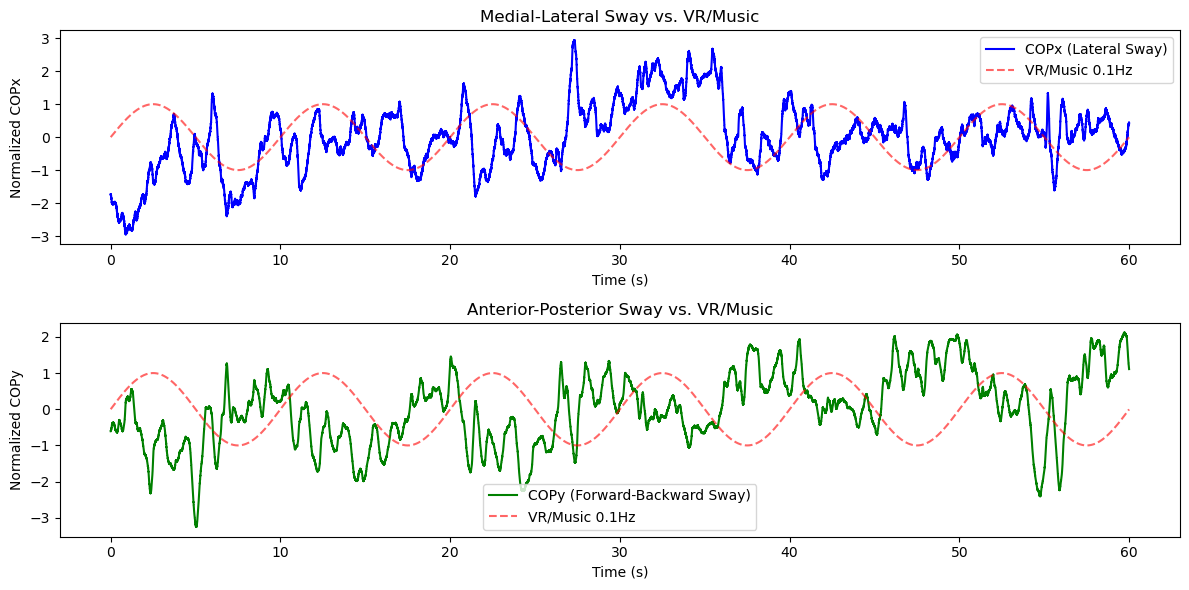

In [32]:
# Check basic statistics
print("COPx Summary:\n", wl1_df["CoPx"].describe())
print("COPy Summary:\n", wl1_df["CoPy"].describe())

# Normalize COPx and COPy (if needed)
cop_x = (cop_x - cop_x.mean()) / cop_x.std()  # Standardize to zero mean, unit variance
cop_y = (cop_y - cop_y.mean()) / cop_y.std()

# Simulate VR motion and music loudness oscillations at 0.1 Hz
t = np.linspace(time.min(), time.max(), len(time))  
vr_music_wave = np.sin(2 * np.pi * 0.1 * t)

# Plot COPx and COPy with VR/music overlay
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, cop_x, label="COPx (Lateral Sway)", color='b')
plt.plot(time, vr_music_wave, linestyle="dashed", color='r', alpha=0.6, label="VR/Music 0.1Hz")
plt.xlabel("Time (s)")
plt.ylabel("Normalized COPx")
plt.legend()
plt.title("Medial-Lateral Sway vs. VR/Music")

plt.subplot(2, 1, 2)
plt.plot(time, cop_y, label="COPy (Forward-Backward Sway)", color='g')
plt.plot(time, vr_music_wave, linestyle="dashed", color='r', alpha=0.6, label="VR/Music 0.1Hz")
plt.xlabel("Time (s)")
plt.ylabel("Normalized COPy")
plt.legend()
plt.title("Anterior-Posterior Sway vs. VR/Music")

plt.tight_layout()
plt.show()

In [26]:
print("TimeSummary:\n", wl1_df["Time"].describe())

TimeSummary:
 count    59996.000000
mean        29.997500
std         17.319498
min          0.000000
25%         14.998750
50%         29.997500
75%         44.996250
max         59.995000
Name: Time, dtype: float64
